# Identifying Fake News on Twitter - Stylistic Model

In [1]:
from fastai.text import * 

In [2]:
from pathlib import Path

rootdir = Path('./')

In [3]:
df = pd.read_csv(rootdir/'tweets.csv')
df.head()

,annotation,has_location,has_media,id,num_hashtags,num_likes,num_mentions,num_retweets,num_urls,text,user_no_profile_image,user_num_favourite_tweets,user_num_followers,user_num_friends,user_num_lists,user_num_tweets,user_protected,user_verified
0,True,False,False,553585504093224962,1,165,0,371,1,Suspected #CharlieHebdo killers are in same ji...,False,13,22719054,113,160916,37210,False,True
1,False,False,False,544277728930062336,0,56,0,251,0,SYDNEY AIRSPACE CLOSED,False,299,201996,3446,2228,21817,False,False
2,True,False,False,544519622389956609,1,110,0,107,0,thank god #SydneySiege is over. so much respe...,False,20745,224483,7810,1298,53735,False,False
3,True,False,False,580327336505176064,0,44,0,383,1,"Germanwings plane crashes in France, up to 150...",False,841,6446943,1053,91710,117720,False,True
4,False,False,True,552981833189969921,1,134,0,233,0,Nice work from Banksy #JeSuisCharlie http://t....,False,1025,119372,222,837,3795,False,False


# Language model

In [4]:
data_lm = TextLMDataBunch.from_csv(rootdir, 'tweets.csv', text_cols=["text"], label_cols=["annotation"])

In [5]:
data_lm.save('data_lm_export.pkl')

In [6]:
data_lm = load_data(rootdir, 'data_lm_export.pkl')

In [7]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.485263,4.750120,0.297321,01:27


In [8]:
learn.predict("RT", n_words=10)

'RT and North American EXTENDED THE'

In [9]:
learn.save_encoder('lm_enc')

# Text Classification Model

In [10]:
data_clas = TextClasDataBunch.from_csv(rootdir, 'tweets.csv', vocab=data_lm.train_ds.vocab, bs=32, text_cols=["text"], label_cols=["annotation"])

In [11]:
data_clas.save('data_clas_export.pkl')

In [12]:
data_clas = load_data(rootdir, 'data_clas_export.pkl', bs=16)

In [16]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [17]:
data_clas.show_batch()

text,target
xxbos xxup breaking xxup news : xxup gunman xxup demanding xxup to xxup speak xxup to xxup australian xxup prime xxup minister xxup and xxup also xxup asking xxup for xxup an xxup islamic xxup state xxup flag xxup to xxup be xxup brought xxup to xxup lindt xxup cafe .,True
xxbos # xxup breaking : xxmaj the xxmaj artist xxmaj formerly xxmaj known xxmaj to xxmaj perform xxmaj will xxmaj not xxmaj be xxmaj doing xxmaj so xxmaj xxunk . xxmaj sorry xxmaj prince xxmaj fans . # xxmaj toronto # xxmaj concert # xxmaj xxunk,False
xxbos xxup german xxup news xxup report : xxmaj co - xxmaj pilot of xxmaj germanwings xxmaj airbus xxmaj was xxup muslim xxup convert … ’ xxmaj hero of xxmaj islamic xxmaj state ’ ? http : / / t.co / xxmaj xxunk m via @gatewaypundit,False
xxbos # xxmaj germanwings xxmaj co xxmaj pilot xxmaj new xxmaj muslim xxmaj convert \n \n xxmaj islamic xxmaj state xxmaj xxunk xxmaj their xxmaj hero \n \n # wakeupamerica xxunk xxunk \n http : / / t.co / xxunk http : / / t.co / xxunk,False
xxbos # xxmaj germanwings latest : http : / / t.co / xxunk \n - # xxmaj airbus xxup a320 crashes in xxmaj french xxmaj alps \n - xxmaj barcelona - to - xxmaj dusseldorf flight \n - 142 passengers & & 6 crew,False


In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


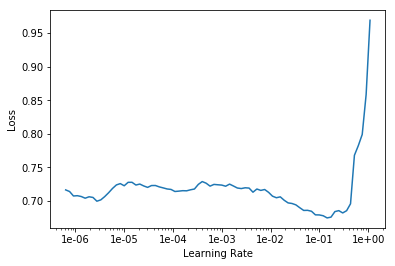

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.597770,0.527242,0.763158,01:53


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


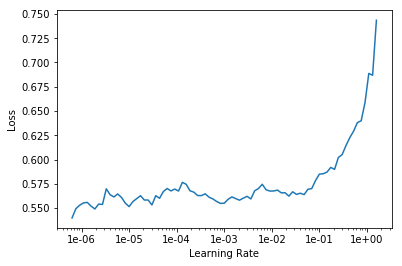

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.show_results()

text,target,prediction
xxbos xxmaj possibly - xxunk - but - who - the - hell - knows - with - this - xxunk - really : xxmaj prince @ xxmaj massey xxmaj hall - xxmaj xxunk 4 ( 2 shows and yes that 's tonight ) xxup xxunk >,False,False
"xxbos xxup developing : xxmaj gunman xxmaj takes xxmaj hostages xxmaj in xxmaj sydney xxmaj cafe , ' xxup isis ' xxmaj flags xxmaj being xxmaj held xxmaj against xxmaj window - http : / / t.co / gdkig15yun http : / / t.co / xxunk",True,True
xxbos xxmaj gendarmerie xxunk at the hostage taking in xxmaj dammartin - en - xxmaj goele . xxmaj latest : http : / / t.co / 7n7uvclhwy ( xxmaj pic : xxmaj xxunk / xxmaj reuters ) http : / / t.co / xxunk,True,True
"xxbos # xxmaj putin / s "" death "" or another # xxunk ? xxmaj military xxunk 's flying over # xxmaj xxunk > http : / / t.co / xxunk # xxmaj xxunk # xxmaj russia # xxmaj putindead # xxup xxunk",False,False
xxbos xxmaj xxunk - a - block w xxmaj prince fans at surprise xxmaj massey xxmaj hall concert in xxup xxunk # xxunk xxmaj he so xxunk xxmaj xxunk http : / / t.co / xxunk http : / / t.co / xxunk,False,False


In [26]:
learn.save('train_clas')

In [28]:
learn.export(file = 'model_clas.pkl')